<a href="https://colab.research.google.com/github/pepemesquita/h2ia/blob/main/ID3_Tree_Cogumelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import numpy as np
import math
import io

In [95]:
#Carregando dataset

dataset = pd.read_csv("agaricus-lepiota.data") #não consegui botar o link para baixar o dataset então upei manualmente aqui pro colab
dataset

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-bewlow-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [96]:
#Transformar nossos queridinhos em números
from sklearn.preprocessing import LabelEncoder
dataset = dataset.apply(LabelEncoder().fit_transform)
dataset


,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-bewlow-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [97]:
def find_entropy(dataset):
    
    #Returns the entropy of the class or features 
    #formula: - ∑ P(X)logP(X)
    
    entropy = 0
    for i in range(dataset.nunique()):
        x = dataset.value_counts()[i]/dataset.shape[0] 
        entropy += (- x * math.log(x,2))
    return round(entropy,3)

def information_gain(dataset, data_):
    
    #Returns the information gain of the features
    
    info = 0
    for i in range(data_.nunique()):
        df = dataset[data_ == data_.unique()[i]]
        w_avg = df.shape[0]/dataset.shape[0]
        entropy = find_entropy(df.play)
        x = w_avg * entropy
        info += x
    ig = find_entropy(dataset.play) - info
    return round(ig, 3)   

#Or the "easy way">>>>>>

In [98]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns=['target'])[['odor']]
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)


In [113]:
from sklearn.tree import DecisionTreeClassifier
#clf = DecisionTreeClassifier()
clf = DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X_train, y_train)
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [100]:
X_test

,odor
3156,1
1392,5
7344,5
5941,2
1239,5
...,...
3837,5
5069,2
4703,2
2764,5


In [101]:
predictions = clf.predict(X_test)
predictions

array([1, 0, 0, ..., 1, 0, 0])

In [102]:
clf.predict_proba(X_test)

array([[0.        , 1.        ],
       [0.96548786, 0.03451214],
       [0.96548786, 0.03451214],
       ...,
       [0.        , 1.        ],
       [0.96548786, 0.03451214],
       [0.96548786, 0.03451214]])

In [103]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

accuracy_score(y_test, predictions)

0.9854531891085416

In [104]:
confusion_matrix(y_test, predictions, labels = [0, 1])

array([[1401,    0],
       [  39, 1241]])

In [105]:
precision_score(y_test, predictions)

1.0

In [106]:
recall_score(y_test, predictions)

0.96953125

In [107]:
print(classification_report(y_test, predictions, target_names = ['poisonous - p', 'edible - e']))

               precision    recall  f1-score   support

poisonous - p       0.97      1.00      0.99      1401
   edible - e       1.00      0.97      0.98      1280

     accuracy                           0.99      2681
    macro avg       0.99      0.98      0.99      2681
 weighted avg       0.99      0.99      0.99      2681



In [108]:
feature_names = X.columns
feature_names

Index(['odor'], dtype='object')

In [109]:
clf.feature_importances_

array([1.])

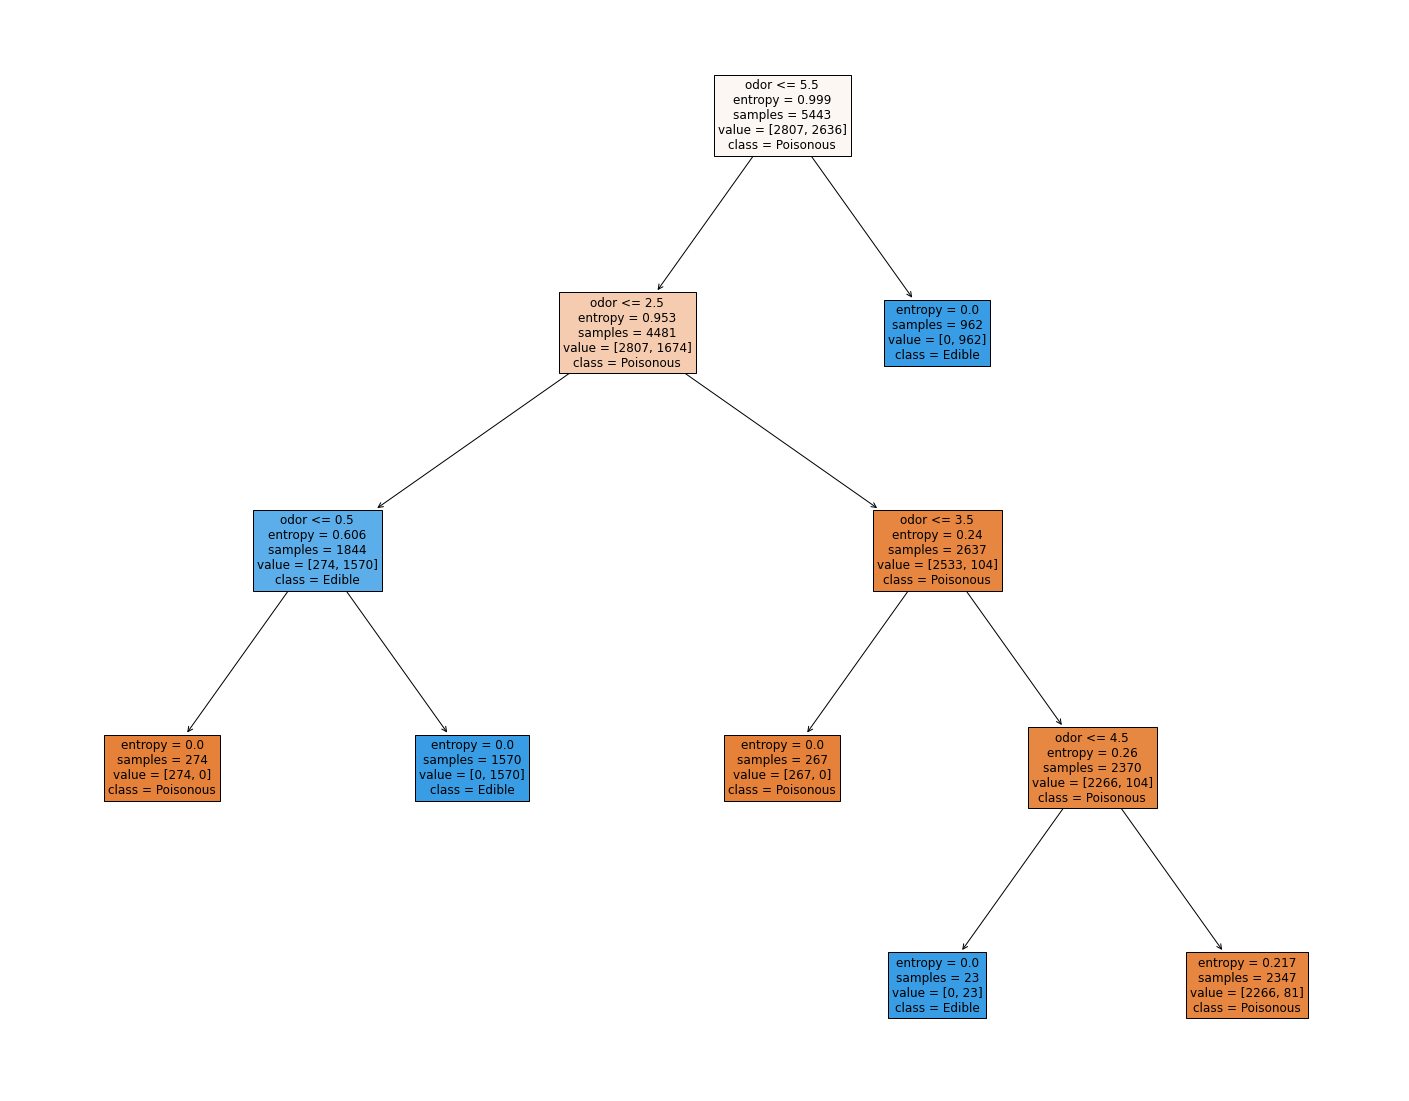

In [114]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (25, 20))
_ = tree.plot_tree(clf,
                   feature_names=feature_names,
                   class_names = {0: 'Poisonous', 1: 'Edible'},
                   filled = True,
                   fontsize = 12)